In [1]:
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient
import pickle

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 933)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
client = MongoClient()
database = client['food_map']   # Database name (to connect to)
collections = database['flavor_molecules']

In [4]:
flavorDB_pandas = pd.DataFrame(list(collections.find()))
flavorDB_pandas = flavorDB_pandas[["_id", "ingredient", "catgeory", "molecules", "molecule_IDs"]]

In [5]:
flavorDB_pandas

,_id,ingredient,catgeory,molecules,molecule_IDs
0,5ca27b8f13218a1eabac63d6,Egg,Animal Product,"[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12..."
1,5ca27b9113218a1eabac63d7,Bakery Products,Bakery,"[2,3-Dimethylpyrazine, 2,5-Dimethylpyrazine, 2...","[22201, 31252, 26331, 27457, 7976, 26808]"
2,5ca27b9213218a1eabac63d8,Bread,Bakery,"[coumarin, Methyl Benzoate, 3-Hexanone, Gerani...","[323, 7150, 11509, 637566, 439341, 33931, 9261..."
3,5ca27b9313218a1eabac63d9,Rye Bread,Bakery,"[2-Methylbutyl Acetate, 3-methylthiopropanol, ...","[12209, 10448, 5372954, 8468, 643731, 7344, 18..."
4,5ca27b9413218a1eabac63da,Wheaten Bread,Bakery,"[Difurfuryl ether, 2-Undecanone, Octyl acetate...","[263034, 8163, 8164, 12170, 228583, 9589, 6375..."
5,5ca27b9513218a1eabac63db,White Bread,Bakery,"[2-Furaldehyde, 3-Methyl-2-Buten-1-Ol, Ethyl L...","[7362, 11173, 10883, 61020, 11559, 7361, 12170..."
6,5ca27b9713218a1eabac63dc,Wholewheat Bread,Bakery,"[4-Methyl-2-pentanone, 2-Methyltetrahydrofuran...","[7909, 18522, 12327, 36822, 65064, 107905, 643..."
7,5ca27b9813218a1eabac63dd,Wort,Beverage,"[2-Furaldehyde, Benzyl Acetate, 4-Propenyl-2,6...","[7362, 8785, 5352905, 8163, 8063, 5281, 7909, ..."
8,5ca27b9913218a1eabac63de,Arrack,Beverage Alcoholic,"[Propyl acetate, Methyl Acetate, benzaldehyde,...","[7997, 6584, 240, 31249, 1031]"
9,5ca27b9b13218a1eabac63df,Beer,Beverage Alcoholic,"[(2E,4E)-Undeca-2,4-dienal, Isoamyl butyrate, ...","[5367531, 7795, 20083, 10558, 16617, 12209, 22..."


In [6]:
flavorDB_pandas["set_molecules"] = flavorDB_pandas["molecules"].apply(lambda row: set(row))
flavorDB_pandas["set_molecules_ID"] = flavorDB_pandas["molecule_IDs"].apply(lambda row: set(row))
flavorDB_pandas["total_number_of_molecules"] = flavorDB_pandas["molecules"].apply(lambda row: len(row))

flavorDB_pandas.head()

,_id,ingredient,catgeory,molecules,molecule_IDs,set_molecules,set_molecules_ID,total_number_of_molecules
0,5ca27b8f13218a1eabac63d6,Egg,Animal Product,"[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","{1-Undecanol, Thiamine Hydrochloride, Styrene,...","{18554, 3776, 6140, 402, 12748, 12020, 12180, ...",55
1,5ca27b9113218a1eabac63d7,Bakery Products,Bakery,"[2,3-Dimethylpyrazine, 2,5-Dimethylpyrazine, 2...","[22201, 31252, 26331, 27457, 7976, 26808]","{2-Methylpyrazine, 2-Ethyl-3-Methylpyrazine, 2...","{7976, 26808, 31252, 22201, 27457, 26331}",6
2,5ca27b9213218a1eabac63d8,Bread,Bakery,"[coumarin, Methyl Benzoate, 3-Hexanone, Gerani...","[323, 7150, 11509, 637566, 439341, 33931, 9261...","{cis-3-Hexenyl acetate, Tributyrin, 2-Methylfu...","{14286, 2969, 8892, 6560, 5280511, 11552, 8130...",129
3,5ca27b9313218a1eabac63d9,Rye Bread,Bakery,"[2-Methylbutyl Acetate, 3-methylthiopropanol, ...","[12209, 10448, 5372954, 8468, 643731, 7344, 18...","{Thiamine Hydrochloride, cis-Cinnamic acid, He...","{7344, 8468, 12366, 12020, 8158, 5372954, 460,...",30
4,5ca27b9413218a1eabac63da,Wheaten Bread,Bakery,"[Difurfuryl ether, 2-Undecanone, Octyl acetate...","[263034, 8163, 8164, 12170, 228583, 9589, 6375...","{2,4-Hexadienal, methylglyoxal, 2,3,5-Trimethy...","{14286, 8163, 7359, 7711, 9589, 6915, 19310, 7...",30


In [7]:
flavorDB_pandas["catgeory"].unique()

array(['Animal Product', 'Bakery', 'Beverage', 'Beverage Alcoholic',
       'Beverage Caffeinated', 'Cereal', 'Maize', 'Dairy',
       'Essential Oil', 'Berry', 'Seafood', 'Fish', 'Flower', 'Fruit',
       'Fruit-Berry', 'Fruit Citrus', 'Fruit Essence', 'Fungus', 'Herb',
       'Meat', 'Dish', 'Nut', 'Seed', 'Legume', 'Plant Derivative',
       'Plant', 'Spice', 'Vegetable', 'Cabbage', 'Vegetable Root',
       'Vegetable Fruit', 'Gourd', 'Vegetable Stem', 'Vegetable Tuber',
       'Additive'], dtype=object)

(array([314.,  49.,  15.,  18.,  13.,  13.,   7.,  11.,   6.,   9.,   8.,
          7.,   9.,   6.,   3.,   4.,   1.,   1.,   2.,   1.,   0.,   2.,
          1., 147.,  34.,  19.,  18.,  10.,  22.,  10.,  14.,   8.,  12.,
         15.,   8.,   8.,   8.,   8.,   5.,   5.,   2.,   7.,   8.,   5.,
          5.,   5.,   4.,   2.,   4.,   3.,   3.,   2.,   5.,   3.,   2.,
          2.,   2.,   5.,   0.,   0.,   2.,   1.,   1.,   0.,   2.,   1.,
          2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1. ,   4.9,   8.8,  12.7,  16.6,  20.5,  24.4,  28.3,  32.2,
         36.1,  40. ,  43.9,  47.8,  51.7,  55.6,  59.5,  63.4,  67.3,
         71.2,  75.1,  79. ,  82.9,  86.8,  90.7,  94.6,  98.5, 102.4,
        106.3, 110.2, 114.1, 118. , 121.9, 125.8, 129.7, 133.6, 137.5,
        141.4, 145.3, 149.2, 153.1

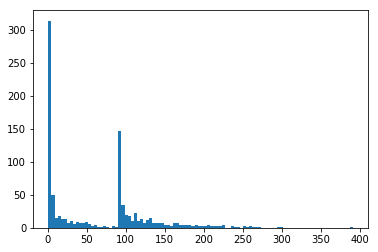

In [8]:
plt.hist(flavorDB_pandas["total_number_of_molecules"], bins=100)

In [9]:
flavor_matrix_df = {}

#iterate through each row of flavorDB
for index, row in flavorDB_pandas.iterrows():

    #might incorporate this might not
    list_of_shared_molecules = []
    list_of_number_of_shared_molecules = []
    
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]
    
    #starting a dictionary entry with a value of an empty dict
    flavor_matrix_df[ingredient_1] = {}  
    
    #iterate through the "columns" of ingredients
    for index, row in flavorDB_pandas.iterrows():
        
        #set of the ingredient from the "columns" of ingredients
        set2 = row["set_molecules"]
        #nome of the ingredient from the "columns" of ingredients
        ingredient_2 = row["ingredient"]
        
        #The molecules that are shared between the two sets
        shared_molecules = set1.intersection(set2)       
        
        #access the dictionary of a dictionary from 1st ingredient 
        #set the value as the number of shared molecules
        flavor_matrix_df[ingredient_1][ingredient_2] = len(shared_molecules)
    break

print(flavor_matrix_df)
    


{'Egg': {'Egg': 55, 'Bakery Products': 3, 'Bread': 23, 'Rye Bread': 8, 'Wheaten Bread': 5, 'White Bread': 2, 'Wholewheat Bread': 16, 'Wort': 17, 'Arrack': 0, 'Beer': 37, 'Bantu Beer': 3, 'Brandy': 5, 'Anise Brandy': 5, 'Apple Brandy': 6, 'Armagnac Brandy': 5, 'Blackberry Brandy': 5, 'Cherry Brandy': 5, 'Cognac Brandy': 21, 'Papaya Brandy': 5, 'Pear Brandy': 5, 'Plum Brandy': 10, 'Raspberry Brandy': 5, 'Weinbrand Brandy': 5, 'Gin': 5, 'Rum': 29, 'Whisky': 16, 'Bourbon Whisky': 14, 'Canadian Whisky': 13, 'Finnish Whisky': 15, 'Japanese Whisky': 13, 'Malt Whisky': 14, 'Scotch Whisky': 17, 'Wine': 20, 'Bilberry Wine': 16, 'Botrytized Wine': 16, 'Champagne': 16, 'Cider': 6, 'Plum Wine': 16, 'Port Wine': 18, 'Red Wine': 19, 'Rose Wine': 17, 'Sake': 9, 'Sherry': 21, 'Sparkling Wine': 16, 'Strawberry Wine': 16, 'White Wine': 22, 'Coffee': 42, 'Mate': 13, 'Black Tea': 4, 'Green Tea': 4, 'Roibos Tea': 0, 'Barley': 26, 'Crispbread': 10, 'Malt': 28, 'Oats': 30, 'Rice': 37, 'Corn': 29, 'Corn Oil': 

In [10]:
#Opening the pickled file
pickle_in = open("../data/ingredients/flavor_matrix_dict.pickle","rb")

#Getting the dictionary from the pickle
flavor_matrix_dict = pickle.load(pickle_in)

#Making a dataframe out of the dictionary of dictionaries
flavor_matrix_df = pd.DataFrame(flavor_matrix_dict)
flavor_matrix_df = flavor_matrix_df.sort_index(axis=1)
flavor_matrix_df = flavor_matrix_df.sort_index(axis=0)


In [11]:
flavor_matrix_df

,Abalone,Abiyuch,Acerola,Achilleas,Acorn,Adobo,Adzuki bean,Agar,Agave,Akutaq,Alaska blackfish,Alaska pollock,Alaska wild rhubarb,Albacore tuna,Alfalfa,Allium,Allspice,Almond,Alpine sweetvetch,Alpinia,Amaranth,American butterfish,American pokeweed,American shad,Anatidae,Anchovy,Angelica,Anguilliformes,Anise,Anise Brandy,Anise Hyssop,Annual wild rice,Apple,Apple Brandy,Apple Cider Vinegar,Apple Sauce,Apricot,Arabica coffee,Arar,Arepa,Armagnac Brandy,Arrack,Arrowhead,Arrowroot,Artemisia,Artichoke,Asafoetida,Ascidians,Ashgourd,Asparagus,Atlantic croaker,Atlantic halibut,Atlantic herring,Atlantic mackerel,Atlantic menhaden,Atlantic pollock,Atlantic salmon,Atlantic wolffish,Avocado,Babaco,Babassu palm,Bagel,Baked potato,Bakery Products,Bamboo shoots,Banana,Bantu Beer,Barley,Bartlett Pear,Basil,Basmati Rice,Bayberry,Beans,Bearded seal,Beaver,Beech nut,Beef,Beef Processed,Beefalo,Beer,Beetroot,Beli,Beluga whale,Bergamot,Berry,Berry wine,Beverage alcolohic other,Bilberry,Bilberry Wine,Biscuit,Bison,Bitter Cherry,Bitter Orange,Bittergourd,Bivalvia,Black Currant,Black Tea,Black bear,Black crowberry,Black huckleberry,Black mulberry,Black raspberry,Black salsify,Black-eyed pea,Blackberry,Blackberry Brandy,Blue Cheese,Blue whiting,Blueberry,Bluefish,Bonito,Borage,Botrytized Wine,Bottlegourd,Bourbon Whisky,Bowhead whale,Boysenberry,Brandy,Brazil Nut,Bread,Breadfruit,Breadnut tree seed,Breakfast cereal,Breakfast sandwich,Broad whitefish,Broccoli,Brown bear,Brussels Sprout,Buchu,Buckwheat,Buffalo,Buffalo currant,Bulgur,Burbot,Burdock,Burrito,Butter,Buttermilk,Butternut,Butternut squash,Byrsonima crassifolia,Cabbage,Cajeput,Cake,Calamus,Camembert Cheese,Camphor,Canada blueberry,Canadian Whisky,Candy bar,Canola Oil,Capers,Capsicum,Caraway,Cardamom,Cardoon,Caribou,Carob,Carom Seed,Carp bream,Carrot,Cascarilla,Casein,Cashew Apple,Cashew nut,Cassava,Cassia,Catfish,Catjang pea,Cauliflower,Caviar,Cedar,Celery,Ceriman,Cetacea,Chamomile,Champaca,Champagne,Channel catfish,Chanterelle,Chard,Charr,Chayote,Cheddar Cheese,Cheese,Cherimoya,Cherry,Cherry Brandy,Cherry Pepper,Cherry tomato,Chervil,Chestnut,Chewing gum,Chia,Chicken,Chickpea,Chicory,Chili,Chimichanga,Chinese Quince,Chinese bayberry,Chinese chestnut,Chinook salmon,Chive,Chocolate,Chocolate mousse,Chocolate spread,Chum salmon,Cichlidae,Cider,Cinnamon,Cisco,Citronella,Citrus Fruits,Citrus Peel Oil,Clam,Clary Sage,Climbing bean,Cloud ear fungus,Cloudberry,Clove,Clupeinae,Cluster Bean,Cocktail,Cocoa,Cocoa butter,Cocoa powder,Coconut,Codfish,Coffee,Coffee mocha,Cognac Brandy,Coho salmon,Cold cut,Colocasia,Colorado pinyon,Columbidae,Common Tuna,Common carp,Common dab,Common ling,Common octopus,Common persimmon,Common salsify,Common verbena,Comte Cheese,Conch,Condensed milk,Cooking oil,Coriander,Corn,Corn Oil,Corn chip,Corn grits,Corn salad,Cornbread,Cornmint,Cottage Cheese,Cottonseed,Couscous,Crab,Cranberry,Crayfish,Cream,Cream Cheese,Creosote,Crispbread,Cucumber,Cumin,Cupuau,Currant,Curry Leaf,Cusk,Cuttlefish,Dairy Products,Dandelion,Dates,Deer,Deerberry,Devilfish,Dill,Dock,Dolphin fish,Domiati Cheese,Dragée,Drumstick Leaf,Dulce de leche,Dumpling,Durian,Egg,Egg roll,Eggplant,Elderberry,Elk,Elliott's blueberry,Emmental Cheese,Empanada,Emu,Enchilada,Endive,Energy drink,Enokitake,Epazote,Eucalyptus,European anchovy,European chestnut,European rabbit,Evaporated milk,Evening primrose,Falafel,Fatty Fish,Feijoa,Fennel,Fenugreek,Fermented Tea,Feta Cheese,Fig,Filbert,Finnish Whisky,Fir,Fireweed,Fish,Fish Oil,Fish burger,Flatfish,Flaxseed,Florida pompano,Flour,Focaccia,Frankfurter Sausage,French plantain,French toast,Freshwater drum,Freshwater eel,Fried Potato,Fruit gum,Fruit juice,Fruit preserve,Fruit salad,Frybread,Fudge,Gadiformes,Garcinia Indica,Garden cress,Garfish,Garland chrysanthemum,Garlic,Gefilte fish,Gelatin,Gelatin dessert,Geranium,Ghee,Giant butterbur,Gin,Ginger,Ginkgo nuts,Ginseng,Goat Cheese,Goat Milk,Gooseberry,Gram bean,Grape,Grapefruit,Grapefruit Peel Oil,Grass,Grass pea,Great horned owl,Great

In [12]:
import networkx as nx

In [13]:
G = nx.Graph(flavor_matrix_dict)

In [14]:
G.number_of_nodes()

933

In [15]:
G.number_of_edges()

435711